 **Import Libraries**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split 
%matplotlib inline

**Mount to Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Import Dataset**

In [ ]:
titanic = pd.read_csv('..PATH TO FILE ..')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# **Work on continuous features**

**Check for null values in columns**

In [ ]:
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Handle missing age column with mean**

In [ ]:
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)

**Analyse 'SibSp' and 'Parch' columns**

<Figure size 432x288 with 0 Axes>

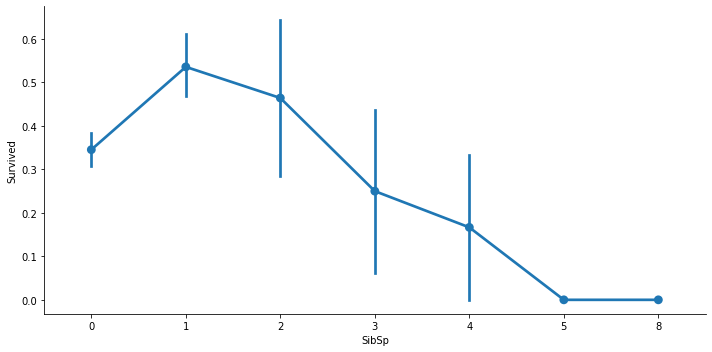

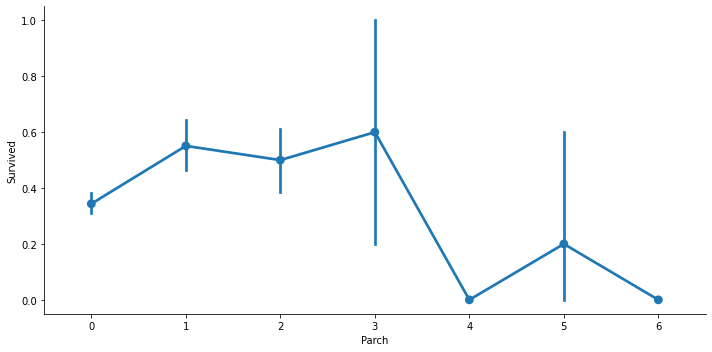

In [ ]:
for i, col in enumerate(['SibSp', 'Parch']):
  plt.figure(i)
  sns.catplot(x=col, y='Survived', data=titanic, kind='point', aspect=2)

**Since both the graphs show the same trend combine both the features**

In [ ]:
titanic['Family_cnt'] = titanic['SibSp'] + titanic['Parch']

**Drop unnecessary continuous features**

In [ ]:
titanic.drop(['PassengerId', 'SibSp', 'Parch'], axis=1, inplace=True)

# **Work on categorical features**

**Since 'Cabin' is closely correlated to 'Survived' (from EDA) we should not delete it.**

In [ ]:
titanic['Cabin_ind'] = np.where(titanic['Cabin'].isnull(), 0, 1) # if cabin is null enter 0 else enter 1

**Replace gender categories in 'Sex' to numeric**

In [ ]:
gender_dict = {'male':0 , 'female':1}
titanic['Sex'] = titanic['Sex'].map(gender_dict)

**Drop unnecessary categorical variables**

In [ ]:
titanic.drop(['Cabin', 'Name', 'Ticket', 'Embarked'], axis=1, inplace=True) # 'Name', 'Ticket' are indicator features

In [ ]:
titanic.head()

,Survived,Pclass,Sex,Age,Fare,Family_cnt,Cabin_ind
0,0,3,0,22.0,7.2500,1,0
1,1,1,1,38.0,71.2833,1,1
2,1,3,1,26.0,7.9250,0,0
3,1,1,1,35.0,53.1000,1,1
4,0,3,0,35.0,8.0500,0,0


# **Perform Train/Val/Test Splits**

In [ ]:
features = titanic.drop('Survived', axis=1)
labels = titanic['Survived']

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.4, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=42)

In [ ]:
for dataset in [y_train, y_val, y_test]:
  print (round(len(dataset) / len(labels), 2))

0.6
0.2
0.2


# **Cross-Validation**

In [ ]:
import warnings
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
warnings.filterwarnings('ignore', category=FutureWarning)

In [ ]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, X_train, y_train, cv=5)

In [ ]:
scores

array([0.8317757 , 0.82242991, 0.79439252, 0.80373832, 0.83018868])

# **Hyperparameter Tuning**

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
def print_results(results):
  print ('BEST PARAMS: {}\n'.format(results.best_params_))

  means = results.cv_results_['mean_test_score']
  stds = results.cv_results_['std_test_score']
  for mean, std, params in zip(means, stds, results.cv_results_['params']):
    print ('{} (+/-{}) for {}'.format(round(mean, 3), round(std, 3), params))

In [ ]:
rf = RandomForestClassifier()
# n_estimators = number of desicion trees in the random forest classifier
# max_depth = # how deep each decision tree go
parameters = {
    'n_estimators' : [5, 50, 100], 
    'max_depth' : [2, 10, 20, None],  
}

cv = GridSearchCV(rf, parameters, cv=5)
cv.fit(X_train, y_train)

print_results(cv)

BEST PARAMS: {'max_depth': 10, 'n_estimators': 100}

0.777 (+/-0.065) for {'max_depth': 2, 'n_estimators': 5}
0.794 (+/-0.062) for {'max_depth': 2, 'n_estimators': 50}
0.792 (+/-0.053) for {'max_depth': 2, 'n_estimators': 100}
0.803 (+/-0.038) for {'max_depth': 10, 'n_estimators': 5}
0.82 (+/-0.026) for {'max_depth': 10, 'n_estimators': 50}
0.828 (+/-0.028) for {'max_depth': 10, 'n_estimators': 100}
0.796 (+/-0.04) for {'max_depth': 20, 'n_estimators': 5}
0.803 (+/-0.019) for {'max_depth': 20, 'n_estimators': 50}
0.807 (+/-0.011) for {'max_depth': 20, 'n_estimators': 100}
0.792 (+/-0.013) for {'max_depth': None, 'n_estimators': 5}
0.817 (+/-0.02) for {'max_depth': None, 'n_estimators': 50}
0.803 (+/-0.013) for {'max_depth': None, 'n_estimators': 100}


# **Validation Set Evaluation**

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

In [ ]:
# 3 best models based on GridSearchCV
rf1 = RandomForestClassifier(n_estimators=100, max_depth=10)
rf1.fit(X_train, y_train)

rf2 = RandomForestClassifier(n_estimators=50, max_depth=10)
rf2.fit(X_train, y_train)

rf3 = RandomForestClassifier(n_estimators=50, max_depth=None)
rf3.fit(X_train, y_train)

RandomForestClassifier(n_estimators=50)

In [ ]:
for mdl in [rf1, rf2, rf3]:
  y_pred = mdl.predict(X_val)
  accuracy = round(accuracy_score(y_val, y_pred), 3)
  precision = round(precision_score(y_val, y_pred), 3)
  recall = round(recall_score(y_val, y_pred), 3)
  print ('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(mdl.max_depth,
                                                                        mdl.n_estimators,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

MAX DEPTH: 10 / # OF EST: 100 -- A: 0.832 / P: 0.859 / R: 0.724
MAX DEPTH: 10 / # OF EST: 50 -- A: 0.832 / P: 0.871 / R: 0.711
MAX DEPTH: None / # OF EST: 50 -- A: 0.804 / P: 0.815 / R: 0.697


We can find the second model is the best although 1st model performed well in GridSearchCV

# **Test Set Evaluation**

In [ ]:
  y_pred = rf2.predict(X_test)
  accuracy = round(accuracy_score(y_test, y_pred), 3)
  precision = round(precision_score(y_test, y_pred), 3)
  recall = round(recall_score(y_test, y_pred), 3)
  print ('MAX DEPTH: {} / # OF EST: {} -- A: {} / P: {} / R: {}'.format(rf2.max_depth,
                                                                        rf2.n_estimators,
                                                                        accuracy,
                                                                        precision,
                                                                        recall))

MAX DEPTH: 10 / # OF EST: 50 -- A: 0.798 / P: 0.774 / R: 0.631
